## <b>Chapter 3. 키워드 분석(Keyword Analysis)</b>

- 키워드란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구이다.
- 키워드 분석이란 불용어 제거와 어간추출 및 형태소 분석 등을 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출하는 것이다.   
- 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초한다.  
- 물론, 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋다.
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있다.

### 1. 환경설정 및 데이터 다운

##### ① 한글 폰트 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [2]:
plt.style.use('seaborn-white')
%config InlineBackend.figure_format = 'retina'

In [3]:
fm.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\LFAXD.TTF',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\RAVIE.TTF',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicBold.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\GARAIT.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\courbi.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Gong Gothic Medium.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\palai.ttf',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Users\\posco

In [4]:
font_path = 'C:\\Users\\poscouser\\AppData\\Local\\Microsoft\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

##### ② 네이버 영화 리뷰 데이터 다운
- 네이버 영화 리뷰 데이터 https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [13]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

In [7]:
print(raw[:3])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

### 2. 형태소 분석

- 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재한다.
- 데이터를 문자열로 변환하고 리뷰만 추출한다.

##### ① 바이트를 문자열로 변환

In [14]:
raw = [x.decode() for x in raw[1:]]
raw

['8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n',
 '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n',
 '4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.\t1\n',
 '9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n',
 '10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.\t1\n',
 '2190435\t사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화\t1\n',
 '9279041\t완전 감동입니다 다시봐도 감동\t1\n',
 '7865729\t개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음\t1\n',
 '7477618\t굿\t1\n',
 '9250537\t바보가 아니라 병 쉰 인듯\t1\n',
 '9730759\t내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...\t1\n',
 '640794\t재밌다\t1\n',
 '9537008\t고질라니무 귀엽다능ㅋㅋ\t1\n',
 '4911311\t영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.\t1\n',
 '6686673\t3도 반전 좋았제 ^^\t1\n',
 '9034036\t평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.\t1\n',
 '979683\t네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..\t1\n',
 '165498\t단연 최고\t1\n',
 '8703997\t가면 갈수록 더욱 빠져드네요 밀회 화이팅!!\t1\n',
 '9468781\t어?생각없이 봤는데 상당한 수작.일본영화 10년내 최

In [16]:
f = open('data_set/ratings.txt', 'r', encoding='utf-8')
raw = f.readlines() # 개행문자를 기준으로 라인 단위 리스트로 반환
print(raw[:3])

['id\tdocument\tlabel\n', '8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n', '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n']


##### ② 리뷰 데이터만 추출

In [15]:
reviews = []

for i in raw:
      reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


##### ③ 형태소 분석기로 명사만 추출

In [17]:
from konlpy.tag import Okt
okt = Okt()

In [18]:
nouns = []

for review in reviews:
      for noun in okt.nouns(review):
            nouns.append(noun)

print(nouns[:10])

['때', '보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '그', '일군']


### 3. 불용어(Stopwords) 제거

##### ① 불용어 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능하다.
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함한다.
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요하다.
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요하다.(예: `영화`)

In [22]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stop_words = stop_words.split(' ')
stop_words

['영화',
 '전',
 '난',
 '일',
 '걸',
 '뭐',
 '줄',
 '만',
 '건',
 '분',
 '개',
 '끝',
 '잼',
 '이거',
 '번',
 '중',
 '듯',
 '때',
 '게',
 '내',
 '말',
 '나',
 '수',
 '거',
 '점',
 '것']

##### ② 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행한다.
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장한다.

In [23]:
nouns = []

for review in reviews:
      for noun in okt.nouns(review):
            if noun not in stop_words:
                  nouns.append(noun)

print(nouns[:10])

['보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '그', '일군', '전통']


In [26]:
from eunjeon import Mecab
mecab = Mecab()

In [27]:
nouns = []

for review in reviews:
      for noun in mecab.nouns(review):
            if noun not in stop_words: # 불용어 제거
                  nouns.append(noun)
print(nouns[:10])

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']


### 4. 빈도 분석

#### 1) 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 패키지의 `Counter` 함수를 이용한다.
* `collections` 패키지는 내장 패키지로 별도 설치가 필요 없다.
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능하다.

In [28]:
from collections import Counter

In [30]:
len(nouns)

859776

In [29]:
c = Counter(nouns)
c

Counter({'디자인': 54,
         '학생': 255,
         '외국': 193,
         '디자이너': 19,
         '그': 1438,
         '전통': 37,
         '발전': 202,
         '문화': 316,
         '산업': 31,
         '우리': 2528,
         '나라': 1411,
         '시절': 875,
         '열정': 207,
         '노라노': 1,
         '저': 1223,
         '사람': 6745,
         '꿈': 590,
         '감사': 607,
         '폴리스': 31,
         '스토리': 7166,
         '시리즈': 1379,
         '뉴': 45,
         '께': 18,
         '하나': 4005,
         '최고': 8782,
         '연기': 9169,
         '지루': 240,
         '생각': 7642,
         '몰입': 1743,
         '안개': 23,
         '밤하늘': 6,
         '초승달': 2,
         '사랑': 4729,
         '처음': 2696,
         '완전': 1745,
         '감동': 6490,
         '전쟁': 928,
         '빠': 288,
         '굿': 2109,
         '바보': 349,
         '병': 298,
         '쉰': 13,
         '나이': 543,
         '훗날': 21,
         '대사': 1261,
         '감정': 918,
         '완벽': 748,
         '이해': 2670,
         '고질라': 49,
         '니무': 1,

In [31]:
top_c = c.most_common(10)
top_c

[('연기', 9169),
 ('최고', 8782),
 ('평점', 8511),
 ('생각', 7642),
 ('스토리', 7166),
 ('드라마', 6891),
 ('사람', 6745),
 ('감동', 6490),
 ('배우', 5883),
 ('내용', 5731)]

In [36]:
top_c = dict(top_c)
top_c

{'연기': 9169,
 '최고': 8782,
 '평점': 8511,
 '생각': 7642,
 '스토리': 7166,
 '드라마': 6891,
 '사람': 6745,
 '감동': 6490,
 '배우': 5883,
 '내용': 5731}

#### 2) 단어 빈도 시각화(그래프)

##### ① 세로 막대 그래프

In [33]:
import numpy as np

x = np.arange(len(top_c))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

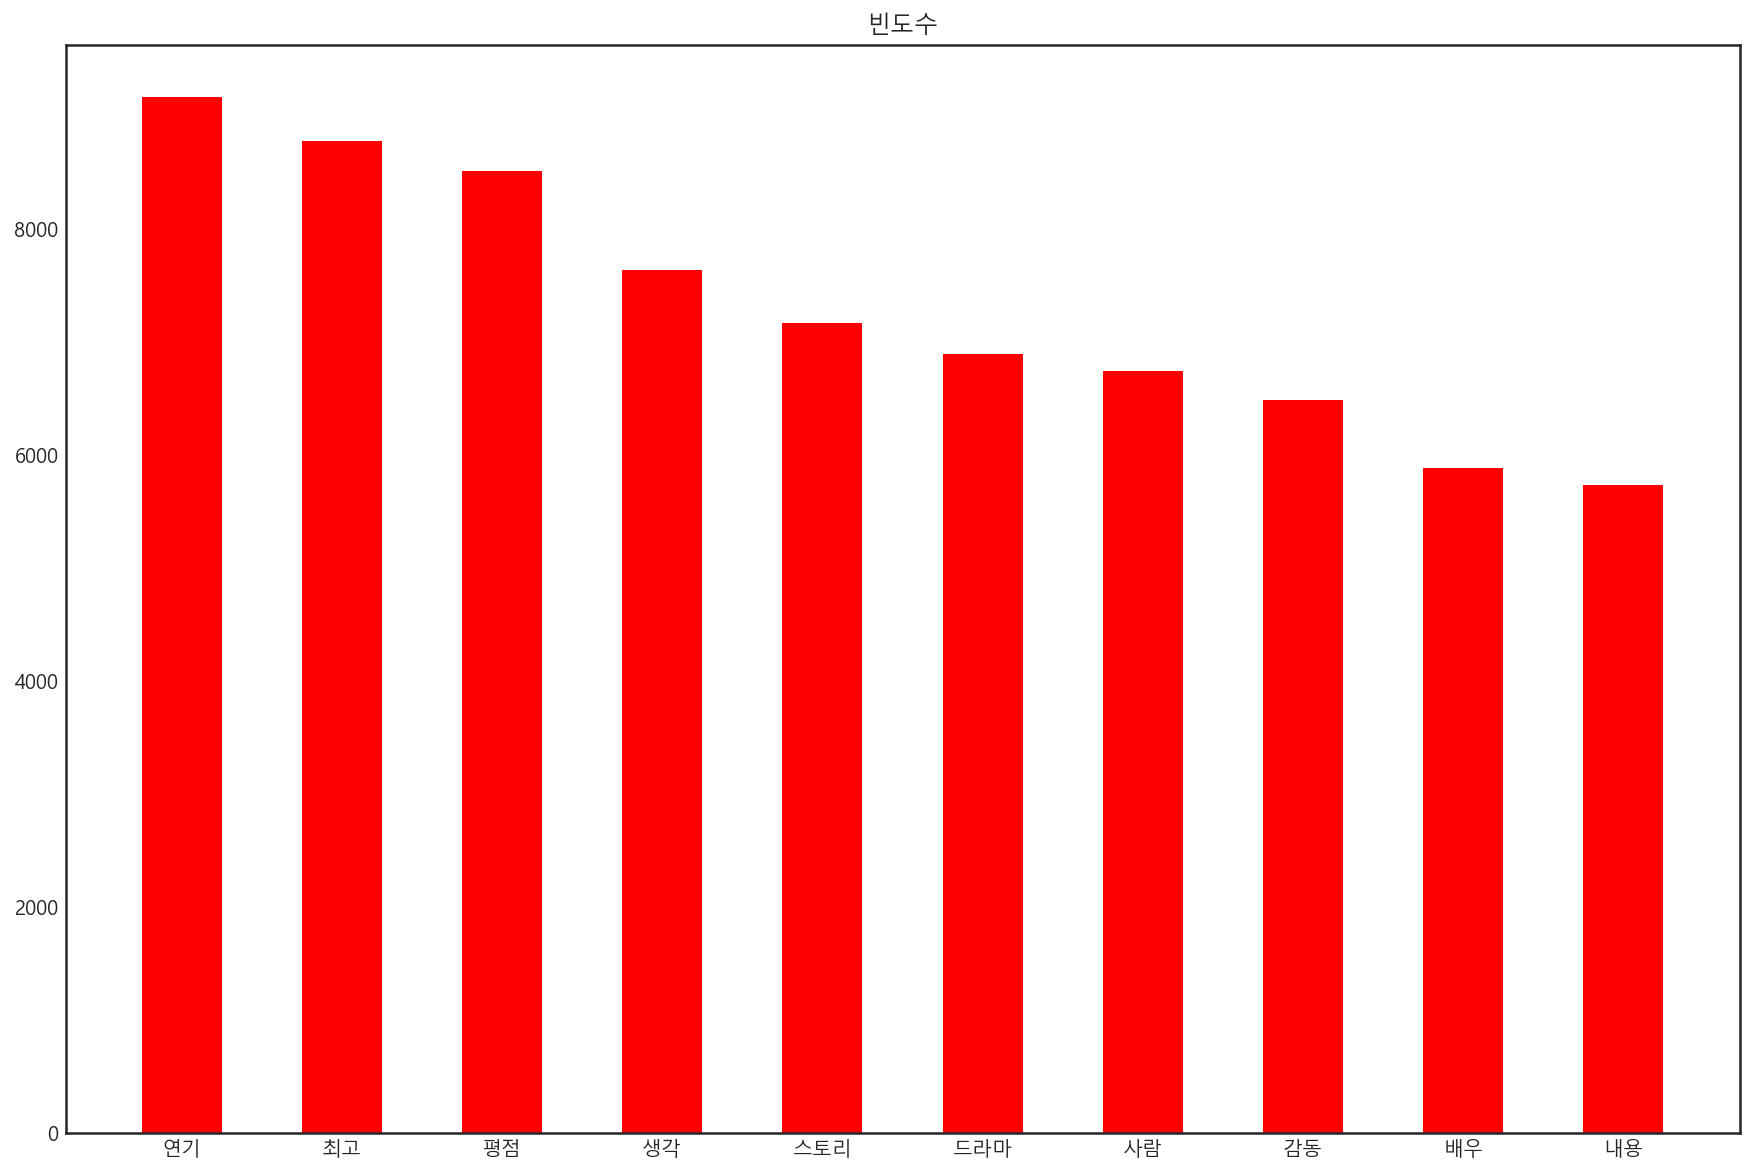

In [37]:
plt.figure(figsize=(15,10))
plt.bar(x, top_c.values(), color='red', width=0.5)
plt.title('빈도수')
plt.xticks(x, top_c.keys())
plt.show();

##### ② 가로 막대 그래프

In [40]:
top_c = dict(c.most_common(50))
y = np.arange(len(top_c))

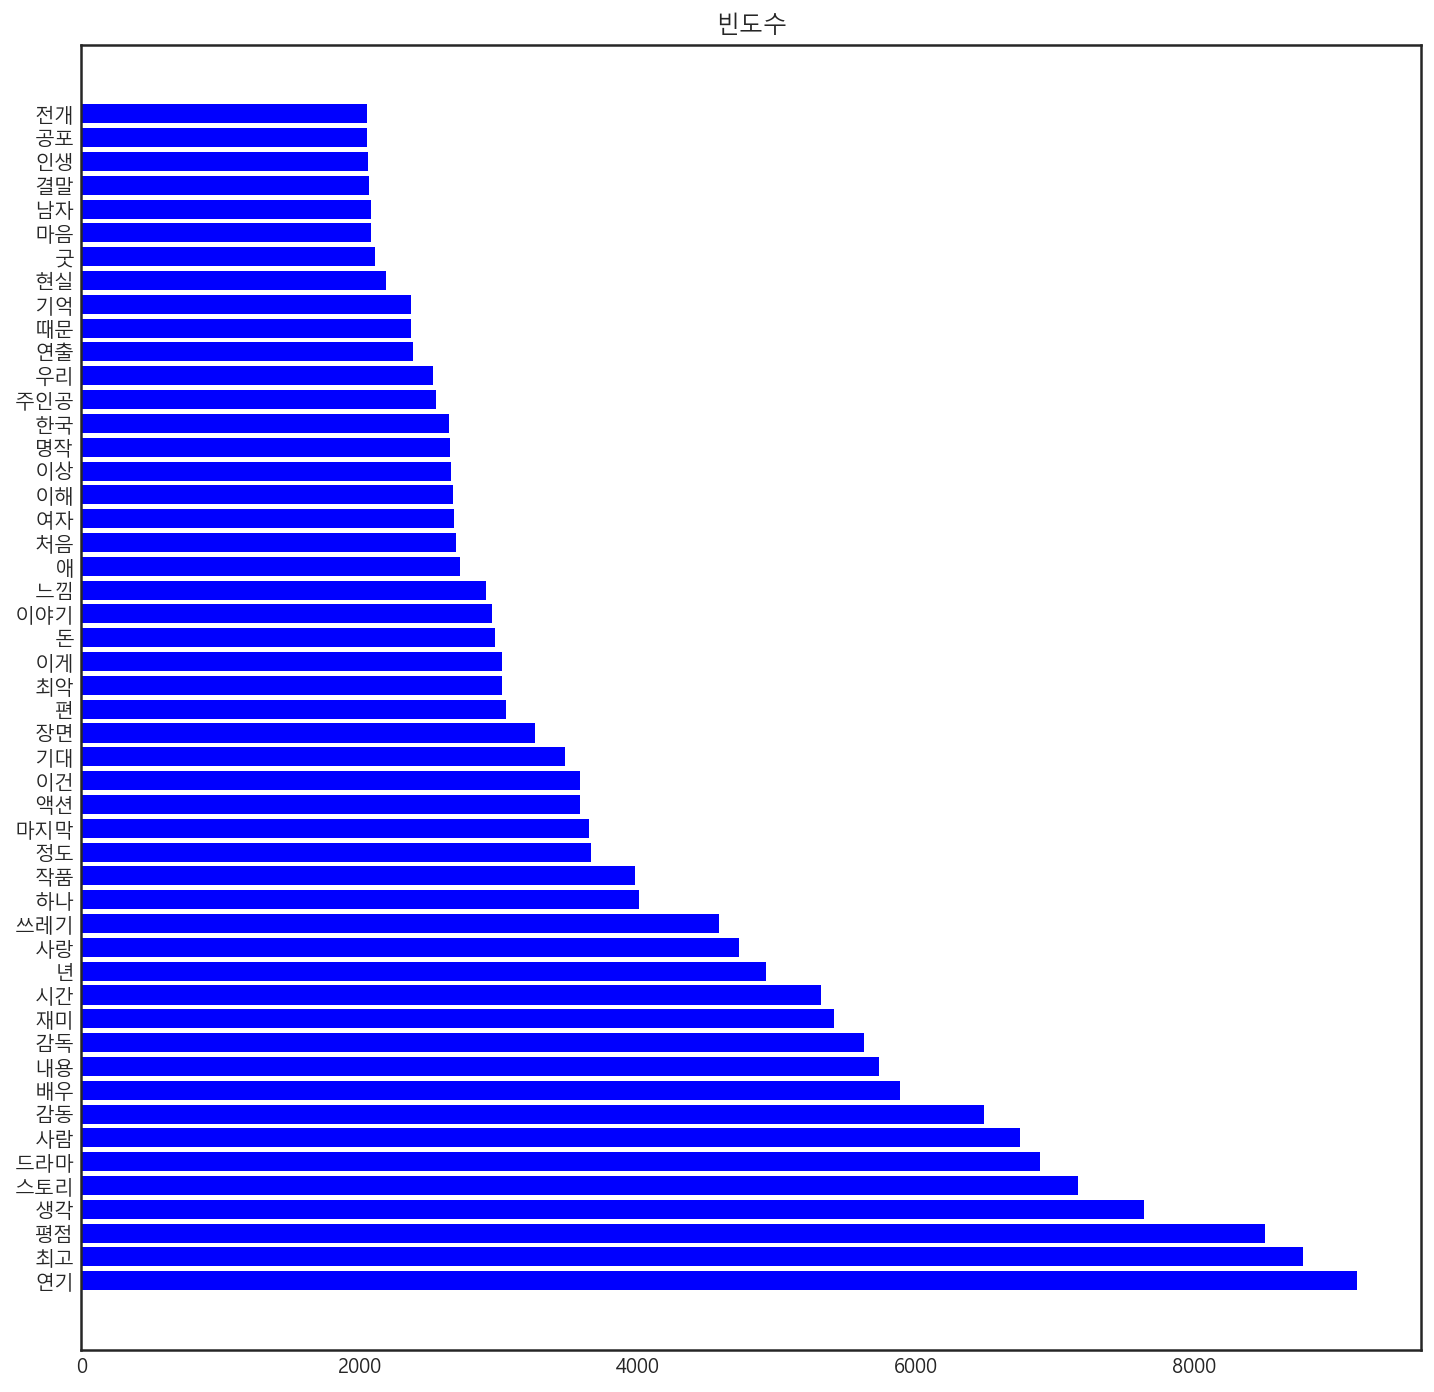

In [42]:
plt.figure(figsize=(12,12))
plt.barh(y, top_c.values(), color='blue', height=0.8)
plt.title('빈도수')
plt.yticks(y, top_c.keys())
plt.show();

#### 3) 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법이다.
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있다.
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화한다.
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있다.

##### ① 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib`와 `WordCloud`를 사용한다.

In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(font_path='gulim', width=800, height=400, scale=2.0, max_font_size=250, max_words=200, background_color='white')
gen = wc.generate_from_frequencies(c)

##### ② WordCloud를 이용해 객체를 생성해주고, `generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성한다.

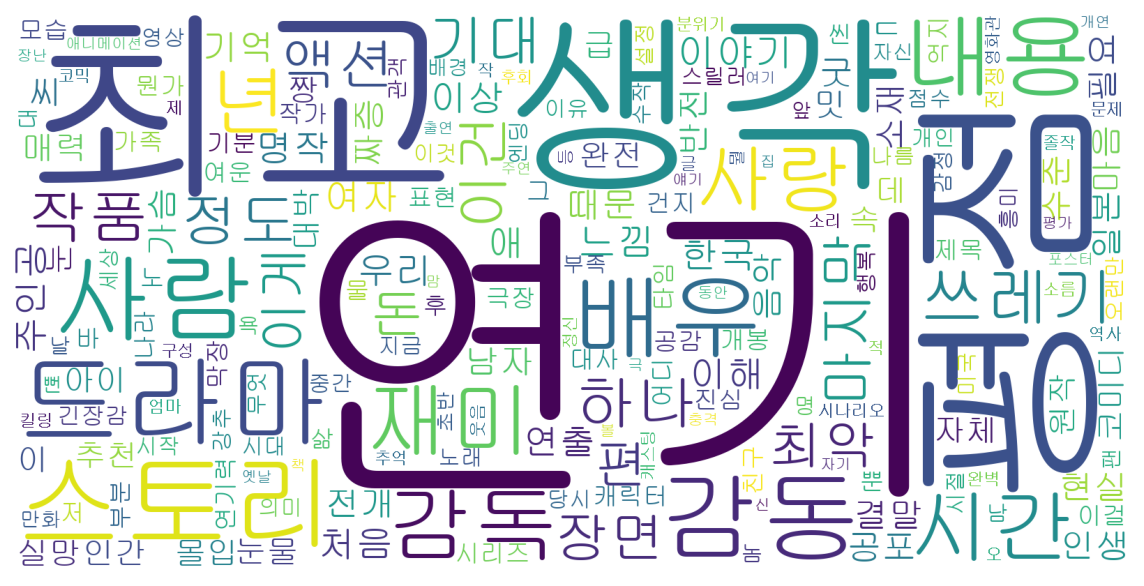

In [45]:
plt.figure(figsize=(10,10))

plt.axis('off')
plt.imshow(gen);

##### ③ 배경 이미지에 워드클라우드 생성 - 배경 이미지를 배열로 변경하여 그 안에 들어가게 만드는 것

In [46]:
from PIL import Image
img = Image.open('./data_set/image.png')
img_array = np.array(img)

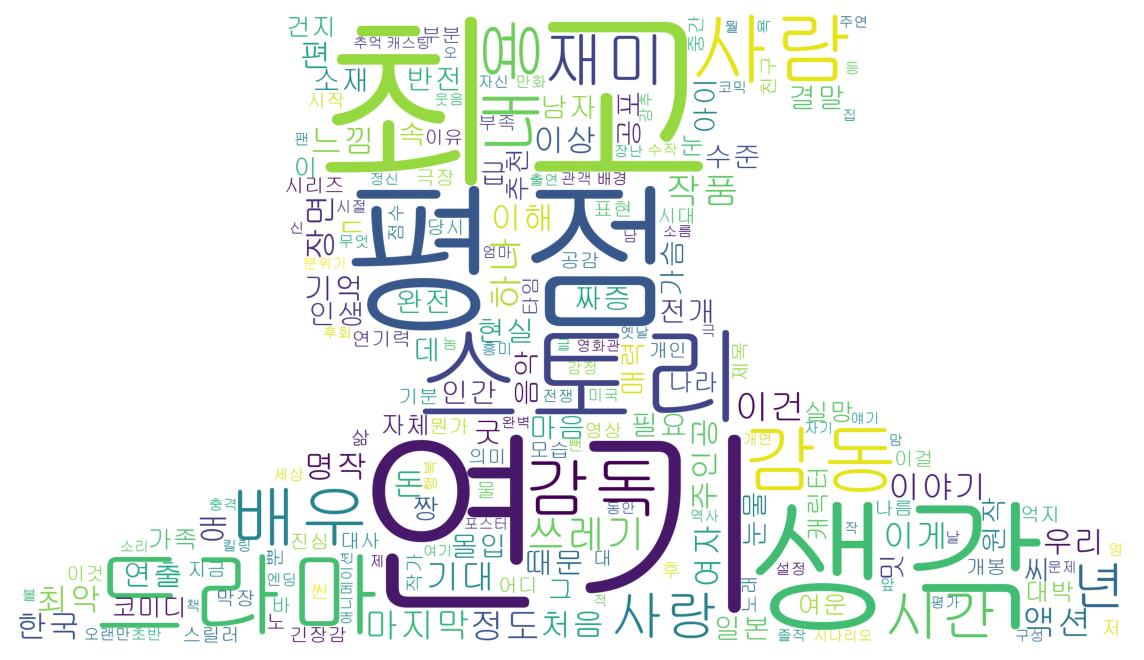

In [48]:
wc = WordCloud(font_path='gulim', mask=img_array, width=400, height=400, scale=2.0, max_font_size=250, max_words=200, background_color='white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10,10))

plt.axis('off')
plt.imshow(gen);

#### 4) squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리이다.
* `squarify`를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타낸다.   

In [49]:
import squarify

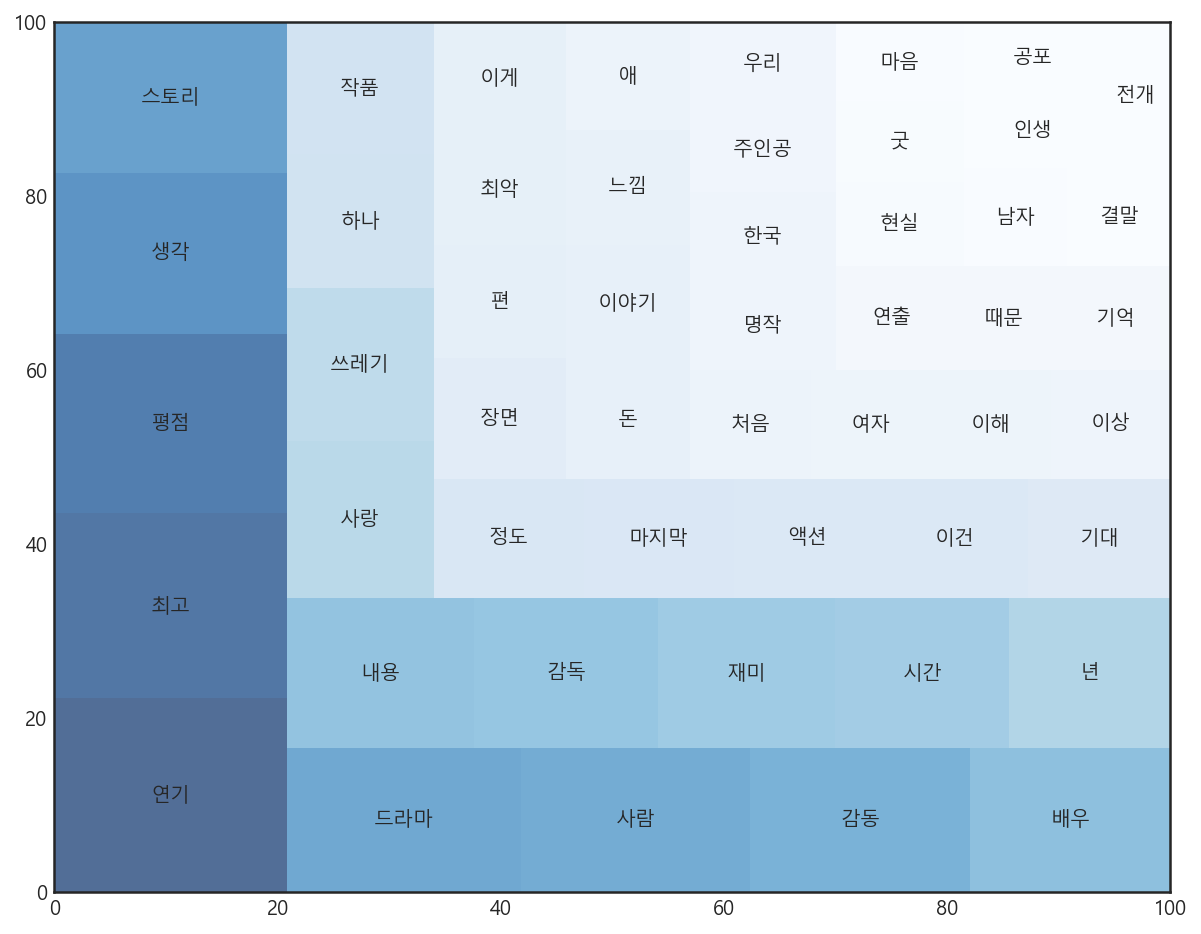

In [51]:
norm = mpl.colors.Normalize(vmin=min(top_c.values()), vmax=max(top_c.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_c.values()]

fig, ax=plt.subplots(1, figsize=(10,8))
squarify.plot(label=top_c.keys(), sizes=top_c.values(), color=colors, alpha=0.7);